Use algorithms "SVM, classification tree, random forest" to predict whether a given car gets high or low gas mileage based on the data in the file 'Auto.csv'.

1. Create a binary variable that takes on a 1 for cars with gas
mileage above the median, and a 0 for cars with gas mileage
below the median.
2. Fit a support vector classifier to the data with various values
of the parameter C, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of this parameter. Comment on your results. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC">LinearSVC</a>)
3. Fit a classification tree to the data with various values
of the parameters max_depth and min_samples_leaf, in order to predict whether a car gets high or low gas
mileage. Report the cross-validation errors associated with different
values of thes parametere. Comment on your results. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier">DecisionTreeClassifier</a>)
4. Fit a random forest to the data with various values
of the parameters tree depth, number of estimators, and maximal featuers, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different
values of thes parameters. (see <a href="http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html">RandomForestClassifier</a>)
5. Make some plots to back up your assertions in (2)-(4).

In [9]:
# write solution here
#1.Create a binary variable that takes on a 1 for cars with gas mileage above the median, and a 0 for cars with gas mileage below the median.
import pandas as pd
import numpy as np
df = pd.read_csv("Auto.csv")

df['mpg_above_median']=''
for i in range(len(df['mpg'])):
    if df['mpg'][i]> np.median(df['mpg']):
        df['mpg_above_median'][i] = 1
    else:
        df['mpg_above_median'][i] = 0 

df

/Users/phoebezhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
/Users/phoebezhu/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_above_median
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,0
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500,0
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala,0
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii,0
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina,0
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl,0


In [10]:
#2.Fit a support vector classifier to the data with various values of the parameter C, in order to predict 
# whether a car gets high or low gas mileage. Report the cross-validation errors associated with different 
# values of this parameter. Comment on your results. (see LinearSVC)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
from sklearn import svm

C_range = [0.02, 0.05, 0.1, 1]

In [11]:
df["horsepower"] = pd.to_numeric(df["horsepower"], errors = 'coerce')
df = df.dropna()

In [12]:
#df.dtypes
X=df[['cylinders','displacement','horsepower','weight','acceleration','year','origin']]
Y=df['mpg_above_median'].astype('int64')

for i in C_range:
    clf = svm.SVC(kernel='linear',C=i)
    clf.fit(X, Y)

In [13]:
# cross validation
from sklearn.model_selection import cross_val_score # cross validation

results=[]
for i in C_range:
    clf = svm.SVC(kernel='linear',C=i)
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append([i,scores.mean(), scores.std()])#====i 是新的c值====scores.mean()是5次cross_val_score的平均值====以及scores.std()
    
df_accuracy = pd.DataFrame(data=results,columns=['C','mean','std'])
df_accuracy

#comment: when the penalty C is larger, the margin is smaller, and it's more accurate

,C,mean,std
0,0.02,0.862480,0.090215
1,0.05,0.859981,0.099797
2,0.10,0.859948,0.088253
3,1.00,0.862415,0.075665


###### 3.Fit a classification tree to the data with various values of the parameters max_depth and min_samples_leaf, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of thes parametere. Comment on your results. (see DecisionTreeClassifier)


In [35]:
#various values of the parameters max_depth
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

results = []
for d in range(1,8):
    clf = tree.DecisionTreeClassifier(max_depth=d)
    clf = clf.fit(X,Y)
    scores = cross_val_score(clf, X, Y, cv=5)
    results.append((d,scores.mean(), scores.std()))
    
df_tree_accuracy = pd.DataFrame(data=results,columns=['depth','mean','std'])
df_tree_accuracy

,depth,mean,std
0,1,0.885005,0.035676
1,2,0.788348,0.096445
2,3,0.775690,0.084156
3,4,0.773126,0.082141
4,5,0.793379,0.101265
5,6,0.775592,0.093835
6,7,0.752678,0.080304


In [36]:
#various values of the parameters min_samples_leaf
results2 = []
for e in range(1,8):
    clf = tree.DecisionTreeClassifier(min_samples_leaf=e)
    clf = clf.fit(X,Y)
    scores2 = cross_val_score(clf, X, Y, cv=5)
    results2.append((e,scores.mean(), scores.std()))
    
df_tree_accuracy2 = pd.DataFrame(data=results,columns=['leaf','mean','std'])
df_tree_accuracy2

#comment: when the tree is deeper, the performance tend to fluctuate and will reach to a point which has the best performance;
#when the tree has more leaves, the performance tend to fluctuate and will reach to a point which has the best performance.
#and it suffers from high-variance

,leaf,mean,std
0,1,0.885005,0.035676
1,2,0.788348,0.096445
2,3,0.775690,0.084156
3,4,0.773126,0.082141
4,5,0.793379,0.101265
5,6,0.775592,0.093835
6,7,0.752678,0.080304


###### 4.Fit a random forest to the data with various values of the parameters tree depth, number of estimators, and maximal featuers, in order to predict whether a car gets high or low gas mileage. Report the cross-validation errors associated with different values of thes parameters. (see RandomForestClassifier)


In [52]:
#various values of number of estimators
from sklearn.ensemble import BaggingClassifier
tree_depth = 1

results = []
n_range = range(1,40,1)
for n in n_range:
    clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=n, max_depth=tree_depth)
    clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)

    results.append((n,clf_rf_scores.mean(),clf_rf_scores.std()))
    
df_accuracy = pd.DataFrame(data=results,columns=['estimators','RF accuracy','RF error'])

df_accuracy
#comment: when estimators is more, the performance tend to be stable

,estimators,RF accuracy,RF error
0,1,0.890133,0.037067
1,2,0.895261,0.036835
2,3,0.872184,0.050967
3,4,0.797760,0.170805
4,5,0.885070,0.026066
5,6,0.897760,0.033781
6,7,0.897825,0.027144
7,8,0.887569,0.034140
8,9,0.890133,0.032330
9,10,0.885005,0.041629


In [71]:
#various values of the parameters tree depth
n_range = range(1,20,1)
for n in n_range:
    clf_rf = RandomForestClassifier(max_features="sqrt", n_estimators=1, max_depth=n)
    clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)

    results2.append((n,clf_rf_scores.mean(),clf_rf_scores.std()))
    
df_accuracy2 = pd.DataFrame(data=results2,columns=['tree depth','RF accuracy','RF error'])
df_accuracy2
#comment: when tree is deeper, the performance tend to be unstable
#and it suffers from high-variance

,tree depth,RF accuracy,RF error
0,1,0.752678,0.080304
1,2,0.752678,0.080304
2,3,0.752678,0.080304
3,4,0.752678,0.080304
4,5,0.752678,0.080304
5,6,0.752678,0.080304
6,7,0.752678,0.080304
7,1,0.877507,0.017615
8,2,0.882441,0.037849
9,3,0.803765,0.077504


In [67]:
#various values of maximal featuers
max_features = ['auto','sqrt','log2']
results3=[]
for n in max_features:
    clf_rf = RandomForestClassifier(max_features=n, n_estimators=1, max_depth=1)
    clf_rf_scores = cross_val_score(clf_rf, X, Y, cv=5)

    results3.append((n,clf_rf_scores.mean(),clf_rf_scores.std()))
    
df_accuracy3 = pd.DataFrame(data=results3,columns=['max_features','RF accuracy','RF error'])
df_accuracy3
#comment: sqrt has the highest performance

,max_features,RF accuracy,RF error
0,auto,0.823466,0.131368
1,sqrt,0.872476,0.053056
2,log2,0.808114,0.163831


###### 5.Make some plots to back up your assertions in (2)-(4).

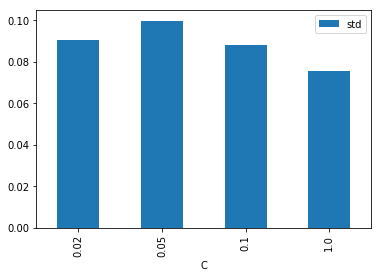

In [32]:
#support vector classifier
df_accuracy.plot.bar(x='C',y='std')

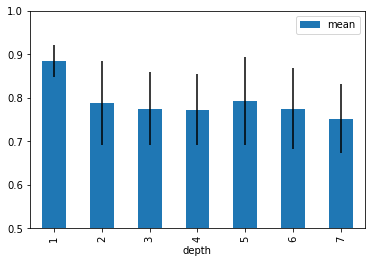

In [39]:
#classification tree
df_tree_accuracy.plot.bar(x='depth',y='mean',yerr='std', ylim=[0.5,1])

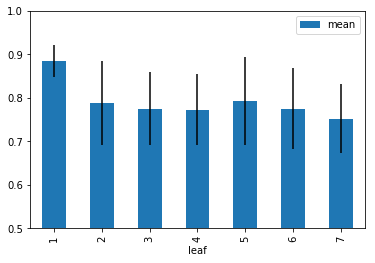

In [41]:
df_tree_accuracy2.plot.bar(x='leaf',y='mean',yerr='std', ylim=[0.5,1])

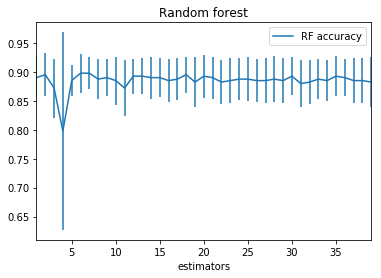

In [65]:
# plot cross-validation results
df_accuracy.plot(x='estimators',y='RF accuracy',yerr='RF error',title='Random forest')

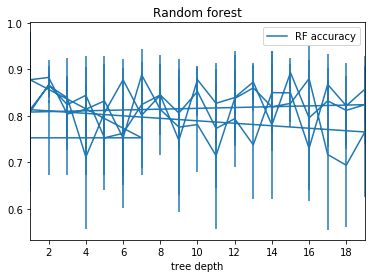

In [72]:
df_accuracy2.plot(x='tree depth',y='RF accuracy',yerr='RF error',title='Random forest')

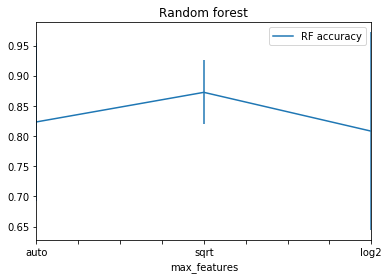

In [68]:
df_accuracy3.plot(x='max_features',y='RF accuracy',yerr='RF error',title='Random forest')

Note: while (most of) the solutions are available in Appendix A and [online](https://github.com/ageron/handson-ml/), answer the questions with your own words and do not copy-paste code. You may submit additional data files if needed.